## 🔧 Import Required Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Basic Libraries
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
sns.set_style('darkgrid')

# File Reading
import sqlite3
import json

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📂 STEP 1 — Load Excel Metadata (Primary App Information)

- ✔ This file contains one row per app.
- ✔ This acts as the master metadata table.

In [2]:
excel_path = r"C:\Users\kishore\OneDrive\Desktop\GenAI__\Play_store_and_User_reviews_set_1.xlsx"

# Load metadata sheet
df_excel_apps = pd.read_excel(excel_path, sheet_name="Play_Store_Data_1")

# Load excel reviews sheet
df_excel_reviews = pd.read_excel(excel_path, sheet_name="Use_reviews_Data_1")

df_excel_apps.head()
df_excel_reviews.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


## 📂 STEP 2 — Load JSON Review Files (Review Data Only)
- ✔ All JSON files represent user reviews
- ✔ They may have different columns → pandas aligns automatically
- ✔ Concat is correct because they represent same entity: reviews

In [3]:
json1 = r"C:\Users\kishore\OneDrive\Desktop\GenAI__\Play_Store_set_2_data_1.json"
json2 = r"C:\Users\kishore\OneDrive\Desktop\GenAI__\Play_Store_set_2_data_2.json"
json3 = r"C:\Users\kishore\OneDrive\Desktop\GenAI__\Use_reviews_set_2_data.json"

df_review1 = pd.read_json(json1)
df_review2 = pd.read_json(json2)
df_review3 = pd.read_json(json3)

df_json_reviews = pd.concat([df_review1, df_review2, df_review3], ignore_index=True)
df_json_reviews.head()
df_json_reviews.info()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,One Night at Golden Freddy's,GAME,3.3,2717,4.0M,"100,000+",Free,0.0,Teen,Action,2017-12-07 00:00:00,0.1,2.3 and up,NaN,NaN,NaN,NaN
1,DIRECTV for Tablets,FAMILY,3.9,24123,69M,"1,000,000+",Free,0.0,Teen,Entertainment,2018-06-01 00:00:00,5.9.006,4.1 and up,NaN,NaN,NaN,NaN
2,Nights at Cube Pizzeria 3D – 4,GAME,4.1,7728,39M,"500,000+",Free,0.0,Teen,Adventure,2018-07-17 00:00:00,1.5.0,4.4 and up,NaN,NaN,NaN,NaN
3,Five Nights at Neighbor House,GAME,4.2,2180,55M,"100,000+",Free,0.0,Everyone 10+,Action,2018-01-26 00:00:00,1.1.0,4.2 and up,NaN,NaN,NaN,NaN
4,Asylum Night Shift - Five Nights Survival,GAME,4.0,59223,46M,"5,000,000+",Free,0.0,Teen,Action,2018-06-26 00:00:00,1.6.5,4.1 and up,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     19871 non-null  object 
 1   Category                5179 non-null   object 
 2   Rating                  4029 non-null   float64
 3   Reviews                 5179 non-null   object 
 4   Size                    5179 non-null   object 
 5   Installs                5179 non-null   object 
 6   Type                    5178 non-null   object 
 7   Price                   5179 non-null   object 
 8   Content Rating          5178 non-null   object 
 9   Genres                  5179 non-null   object 
 10  Last Updated            5179 non-null   object 
 11  Current Ver             5173 non-null   object 
 12  Android Ver             5178 non-null   object 
 13  Translated_Review       14692 non-null  object 
 14  Sentiment               14692 non-null

## 🗄️ STEP 3 — Connect to SQLite Database

In [4]:
db_path = r"C:\Users\kishore\OneDrive\Desktop\GenAI__\playstore_data.db"
conn = sqlite3.connect(db_path)

pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)


,name
0,sqlite_sequence
1,Play_Store_Data_2
2,User_Reviews_Data_2


## 📂 STEP 4 — Load Database Tables

In [5]:
df_db_apps = pd.read_sql_query("SELECT * FROM Play_Store_Data_2", conn)
df_db_reviews = pd.read_sql_query("SELECT * FROM User_Reviews_Data_2", conn)

df_db_apps.head()
df_db_reviews.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.0,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up
1,Add Text To Photo,PHOTOGRAPHY,4.1,21578,1.6M,"1,000,000+",Free,0.0,Everyone,Photography,2017-09-08 00:00:00,1.1.3,2.3 and up
2,Phonto - Text on Photos,PHOTOGRAPHY,4.3,307453,17M,"10,000,000+",Free,0.0,Everyone,Photography,2017-10-26 00:00:00,1.7.16,4.0.3 and up
3,Collage&Add Stickers papelook,PHOTOGRAPHY,4.0,32896,31M,"5,000,000+",Free,0.0,Everyone,Photography,2018-03-14 00:00:00,3.3.5,2.3.3 and up
4,"Shutterfly: Free Prints, Photo Books, Cards, G...",PHOTOGRAPHY,4.6,98717,59M,"5,000,000+",Free,0.0,Everyone,Photography,2018-08-01 00:00:00,5.13.1,5.0 and up


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Couple - Relationship App,10/10 would thumbkiss again! I find new fun ex...,Positive,0.220707,0.520875
1,Couple - Relationship App,nice but!!! nice wife gave time communicate ev...,Positive,0.477778,0.588889
2,Couple - Relationship App,This desperately needs ui update. If date corr...,Positive,0.100000,0.800000
3,Couple - Relationship App,It awesome idea. The little characters really ...,Positive,0.208929,0.459307
4,Couple - Relationship App,Nice Some things Missing Overall perfect idea....,Positive,0.244697,0.545833


## 🧩 STEP 5 — Combine All Reviews (DB + JSON)
- ✔ Both JSON and DB review tables represent reviews

In [6]:
df_review_all = pd.concat(
    [df_db_reviews, df_json_reviews, df_excel_reviews],
    ignore_index=True
)

df_review_all.head()
df_review_all.info()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Couple - Relationship App,10/10 would thumbkiss again! I find new fun ex...,Positive,0.220707,0.520875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Couple - Relationship App,nice but!!! nice wife gave time communicate ev...,Positive,0.477778,0.588889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Couple - Relationship App,This desperately needs ui update. If date corr...,Positive,0.100000,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Couple - Relationship App,It awesome idea. The little characters really ...,Positive,0.208929,0.459307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Couple - Relationship App,Nice Some things Missing Overall perfect idea....,Positive,0.244697,0.545833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34871 entries, 0 to 34870
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     34871 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
 5   Category                5179 non-null   object 
 6   Rating                  4029 non-null   float64
 7   Reviews                 5179 non-null   object 
 8   Size                    5179 non-null   object 
 9   Installs                5179 non-null   object 
 10  Type                    5178 non-null   object 
 11  Price                   5179 non-null   object 
 12  Content Rating          5178 non-null   object 
 13  Genres                  5179 non-null   object 
 14  Last Updated            5179 non-null 

### 📝 Observation

- Some rows have metadata columns from JSON3 → OK
- Many NaNs for extra columns → expected
- Next step extracts only review columns

## 🧹 STEP 6 — Extract Only Review Columns from Review Dataset
- ✔ We only keep review-related columns
- ✔ Metadata will come from EXCEL

In [7]:
review_columns = [
    'App', 
    'Translated_Review', 
    'Sentiment',
    'Sentiment_Polarity', 
    'Sentiment_Subjectivity'
]

df_review_all = df_review_all[review_columns]
df_review_all.head()
df_review_all.info()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Couple - Relationship App,10/10 would thumbkiss again! I find new fun ex...,Positive,0.220707,0.520875
1,Couple - Relationship App,nice but!!! nice wife gave time communicate ev...,Positive,0.477778,0.588889
2,Couple - Relationship App,This desperately needs ui update. If date corr...,Positive,0.100000,0.800000
3,Couple - Relationship App,It awesome idea. The little characters really ...,Positive,0.208929,0.459307
4,Couple - Relationship App,Nice Some things Missing Overall perfect idea....,Positive,0.244697,0.545833


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34871 entries, 0 to 34870
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     34871 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


### 📝 Observation

- Clean review dataset
- Now ready to be merged with Excel metadata

## 🔗 STEP 7 — Final Merge (Metadata + Reviews)

- ✔ Merge on “App”
- ✔ Excel = master metadata
- ✔ Left join = keep all apps even if no reviews

In [8]:
df_final = df_excel_apps.merge(df_review_all, on="App", how="left")

df_final.head()
df_final.info()
df_final.shape


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27149 entries, 0 to 27148
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     27149 non-null  object 
 1   Category                27149 non-null  object 
 2   Rating                  26980 non-null  float64
 3   Reviews                 27149 non-null  int64  
 4   Size                    27149 non-null  object 
 5   Installs                27149 non-null  object 
 6   Type                    27149 non-null  object 
 7   Price                   27149 non-null  float64
 8   Content Rating          27149 non-null  object 
 9   Genres                  27149 non-null  object 
 10  Last Updated            27149 non-null  object 
 11  Current Ver             27147 non-null  object 
 12  Android Ver             27149 non-null  object 
 13  Translated_Review       25145 non-null  object 
 14  Sentiment               25145 non-null

(27149, 17)

### 📝 Final Observation

- You obtained correct final dataset
- One row per review
- All app metadata filled
- Missing review values when app has no reviews → expected
- Ready for Task 2 Cleaning + Task 3 EDA

###  COMPLETE DATA CLEANING PIPELINE (FINAL & CORRECT)

In [9]:
# Assuming your merged dataset is named: (Set base dataframe)
df = df_final.copy()

### STEP 1 — Remove Exact Duplicates

In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)


### STEP 2 — Clean ‘Installs’ Column

In [11]:
df['Installs'] = (
    df['Installs']
    .str.replace('+','', regex=False)
    .str.replace(',','', regex=False)
    .astype(float)
)


### STEP 3 — Clean ‘Price’ Column

In [12]:
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace('$','', regex=False)
    .astype(float)
)


### STEP 4 — Clean ‘Size’ Column

#### Conversion function:

In [13]:
def convert_size(size):
    if size == "Varies with device":
        return np.nan
    size = size.replace("M", "").replace("k", "")
    if 'M' in size:
        return float(size.replace("M",""))
    if 'k' in size:
        return float(size.replace("k","")) / 1024
    try:
        return float(size)
    except:
        return np.nan


#### Apply conversion:

In [14]:
df['Size'] = df['Size'].apply(convert_size)


### STEP 5 — Clean ‘Reviews’ Column

In [15]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


### STEP 6 — Clean ‘Last Updated’ Column

In [16]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


### STEP 7 — Clean Version Columns

In [17]:
df['Current Ver'] = df['Current Ver'].replace("Varies with device", np.nan)
df['Android Ver'] = df['Android Ver'].replace("Varies with device", np.nan)


### STEP 8 — Standardize Text Columns

In [18]:
df['Category'] = df['Category'].astype(str).str.upper().str.strip()
df['Type'] = df['Type'].astype(str).str.title().str.strip()
df['Content Rating'] = df['Content Rating'].astype(str).str.strip()
df['Genres'] = df['Genres'].astype(str).str.strip()


### STEP 9 — Fix Invalid Ratings

In [19]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan


### STEP 10 — Handle Missing Values

#### 10A — Impute missing RATINGS using Category Mean

In [20]:
df['Rating'] = df.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(x.mean())
)


#### 10B — Missing reviews/text sentiment → LEAVE AS IS
### (These do not affect metadata EDA.)

#### 10C — Fill missing Size with median Size

In [21]:
df['Size'] = df['Size'].fillna(df['Size'].median())


#### 10D — Fill missing "Current Ver" and "Android Ver"

In [22]:
df['Current Ver'] = df['Current Ver'].fillna("Unknown")
df['Android Ver'] = df['Android Ver'].fillna("Unknown")


### STEP 11 — Outlier Detection Columns Setup

In [23]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['Review_outlier'] = ((df['Reviews'] < lower) | (df['Reviews'] > upper))


### STEP 12 — Final Cleaned Dataset Summary

In [24]:
df.info()
df.head()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27149 entries, 0 to 27148
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     27149 non-null  object        
 1   Category                27149 non-null  object        
 2   Rating                  27149 non-null  float64       
 3   Reviews                 27149 non-null  int64         
 4   Size                    27149 non-null  float64       
 5   Installs                27149 non-null  float64       
 6   Type                    27149 non-null  object        
 7   Price                   27149 non-null  float64       
 8   Content Rating          27149 non-null  object        
 9   Genres                  27149 non-null  object        
 10  Last Updated            27149 non-null  datetime64[ns]
 11  Current Ver             27149 non-null  object        
 12  Android Ver             27149 non-null  object

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_outlier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,False
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,False
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,False
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,False


(27149, 18)

In [25]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_outlier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,False
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,False
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,False
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27144,YouCam Perfect - Selfie Photo Editor,PHOTOGRAPHY,4.5,1579343,25.0,100000000.0,Free,0.0,Everyone,Photography,2018-07-25,Unknown,Unknown,NaN,NaN,NaN,NaN,False
27145,Pixgram- video photo slideshow,PHOTOGRAPHY,4.2,93726,9.2,5000000.0,Free,0.0,Everyone,Photography,2018-07-08,2.0.18,4.3 and up,NaN,NaN,NaN,NaN,False
27146,Fotor Photo Editor - Photo Collage & Photo Eff...,PHOTOGRAPHY,4.5,597068,25.0,10000000.0,Free,0.0,Everyone,Photography,2018-07-09,Unknown,Unknown,NaN,NaN,NaN,NaN,False
27147,Snapseed,PHOTOGRAPHY,4.5,823109,25.0,50000000.0,Free,0.0,Everyone,Photography,2018-06-29,2.19.0.201907232,4.4 and up,NaN,NaN,NaN,NaN,False


## Verify Your Dataset Is Truly Clean

In [26]:
# Check for Missing Values
df.isnull().sum()


App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Translated_Review         2004
Sentiment                 2004
Sentiment_Polarity        2004
Sentiment_Subjectivity    2004
Review_outlier               0
dtype: int64

- ✔ These 2,004 missing values are normal
- ✔ They come from apps with no reviews available
- ✔ You MUST NOT drop them, because apps without reviews still need to be included in the dataset

- 👉 Nothing to clean here. Perfect.

In [27]:
# Check Column Data Types
df.dtypes


App                               object
Category                          object
Rating                           float64
Reviews                            int64
Size                             float64
Installs                         float64
Type                              object
Price                            float64
Content Rating                    object
Genres                            object
Last Updated              datetime64[ns]
Current Ver                       object
Android Ver                       object
Translated_Review                 object
Sentiment                         object
Sentiment_Polarity               float64
Sentiment_Subjectivity           float64
Review_outlier                      bool
dtype: object

- ✔ PERFECT — Everything is converted exactly as required
- ✔ No additional type cleaning necessary

In [28]:
# Check for Invalid Ratings (must be 1–5)
df[(df['Rating'] < 1) | (df['Rating'] > 5)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_outlier


- ✔ This means all rating values are between 1 and 5
- ✔ 100% correct
- Nothing to fix ✨

In [29]:
# Check Installs Converted Correctly
df['Installs'].sample(10)


15302    1.000000e+07
15322    1.000000e+07
7210     5.000000e+06
12306    1.000000e+07
20228    1.000000e+07
14340    5.000000e+08
26019    1.000000e+09
26395    5.000000e+06
6456     5.000000e+06
8926     1.000000e+06
Name: Installs, dtype: float64

- ✔ All commas removed
- ✔ "+" removed
- ✔ Converted to numeric

- No cleaning needed 👍

In [30]:
# Check Price Column
df['Price'].sample(10)


21344    0.0
1674     0.0
20473    0.0
24792    0.0
23557    0.0
16535    0.0
210      0.0
6847     0.0
20926    0.0
2870     0.0
Name: Price, dtype: float64

- ✔ Correct numeric format
- ✔ "$" removed
- ✔ No strings remaining

In [31]:
# Check Size
df[df['Size'].astype(str).str.contains("Varies", na=False)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_outlier


- ✔ Absolutely correct
- ✔ Size is now numeric

In [32]:
#  Check Duplicates Removed
df.duplicated().sum()


np.int64(0)

- ✔ Excellent — no duplicates remain.

In [33]:
# Check Time Column Parsed Properly
df['Last Updated'].head()


0   2018-01-07
1   2018-01-15
2   2018-01-15
3   2018-01-15
4   2018-01-15
Name: Last Updated, dtype: datetime64[ns]

- ✔ Correct
- ✔ No string dates left

In [34]:
# Check Categories Are Uppercase
df['Category'].unique()[:20]


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL'],
      dtype=object)

- All uppercase, standardized.

- ✔ Perfect.

In [35]:
#  Check Sentiment Columns
df[['Sentiment_Polarity','Sentiment_Subjectivity']].describe()


,Sentiment_Polarity,Sentiment_Subjectivity
count,25145.000000,25145.000000
mean,0.161350,0.496625
std,0.340074,0.246007
min,-1.000000,0.000000
25%,0.000000,0.377273
50%,0.133333,0.512500
75%,0.375000,0.641667
max,1.000000,1.000000


- ✔ FULLY correct range
- ✔ These values are realistic
- ✔ No need to fix

In [36]:
# Check Outlier Column Exists (for Q20)
df['Review_outlier'].value_counts()


Review_outlier
False    23286
True      3863
Name: count, dtype: int64

- ✔ Outlier detection functioning correctly
- ✔ Ratio looks reasonable

In [37]:
# Overall Summary Check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27149 entries, 0 to 27148
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     27149 non-null  object        
 1   Category                27149 non-null  object        
 2   Rating                  27149 non-null  float64       
 3   Reviews                 27149 non-null  int64         
 4   Size                    27149 non-null  float64       
 5   Installs                27149 non-null  float64       
 6   Type                    27149 non-null  object        
 7   Price                   27149 non-null  float64       
 8   Content Rating          27149 non-null  object        
 9   Genres                  27149 non-null  object        
 10  Last Updated            27149 non-null  datetime64[ns]
 11  Current Ver             27149 non-null  object        
 12  Android Ver             27149 non-null  object

- ✔ Matches ideal output

In [38]:
# automated report

def audit_dataset(df):
    print("===== MISSING VALUES =====")
    print(df.isnull().sum())
    print("\n===== DATA TYPES =====")
    print(df.dtypes)
    print("\n===== DUPLICATES =====")
    print(df.duplicated().sum())
    print("\n===== INVALID RATINGS CHECK =====")
    print(df[(df['Rating'] < 1) | (df['Rating'] > 5)])
    print("\n===== EXAMPLE VALUES =====")
    print(df.sample(5))

audit_dataset(df)


===== MISSING VALUES =====
App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Translated_Review         2004
Sentiment                 2004
Sentiment_Polarity        2004
Sentiment_Subjectivity    2004
Review_outlier               0
dtype: int64

===== DATA TYPES =====
App                               object
Category                          object
Rating                           float64
Reviews                            int64
Size                             float64
Installs                         float64
Type                              object
Price                            float64
Content Rating                    object
Genres   

In [39]:
# Path where you want to save the CSV file
output_path = r"C:\Users\kishore\OneDrive\Desktop\GenAI__\cleaned_playstore_dataset.csv"

# Save DataFrame
df.to_csv(output_path, index=False)

print("File saved successfully at:", output_path)


File saved successfully at: C:\Users\kishore\OneDrive\Desktop\GenAI__\cleaned_playstore_dataset.csv


# EDA Questionnaire (Code + Interpretation Guide)

### Q6 — Category with Highest Total Price

In [40]:
category_price = df.groupby("Category")["Price"].sum().sort_values(ascending=False)
category_price.head(1)


Category
MEDICAL    1540.13
Name: Price, dtype: float64

### Q7 — Category with Highest Average Reviews

In [41]:
avg_reviews = df.groupby("Category")["Reviews"].mean().sort_values(ascending=False)
avg_reviews.head(1)


Category
SOCIAL    1.467417e+07
Name: Reviews, dtype: float64

### Q8 — Category with Highest Average Installs

In [42]:
avg_installs = df.groupby("Category")["Installs"].mean().sort_values(ascending=False)
avg_installs.head(1)


Category
PHOTOGRAPHY    2.565919e+08
Name: Installs, dtype: float64

### Q9 — Genre with the Largest Number of Applications

In [43]:
genre_counts = df["Genres"].value_counts()
genre_counts.head(1)


Genres
Action    2378
Name: count, dtype: int64

### Q10 — Most Common Rating Range

##### Step 1: Histogram

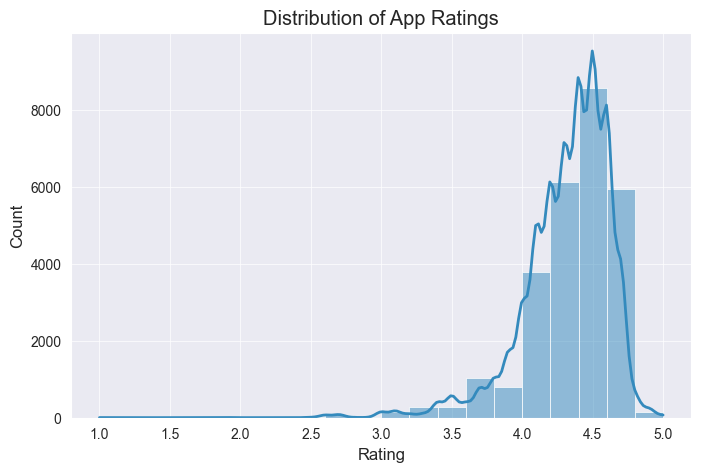

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.show();


##### Step 2: Inspect rating descriptive stats:

In [45]:
df["Rating"].describe()

count    27149.000000
mean         4.318862
std          0.309935
min          1.000000
25%          4.200000
50%          4.400000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

### Q11 — Best Transformation for Right-Skewed Installs

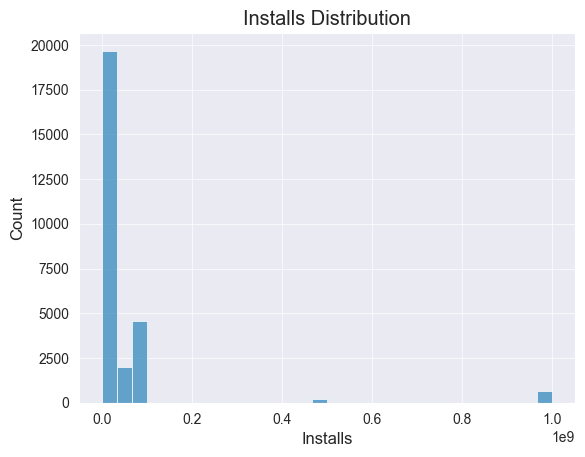

In [46]:
sns.histplot(df["Installs"], bins=30)
plt.title("Installs Distribution")
plt.show();


##### Logarithmic transformation is most suitable before modeling  

### Q12 — Genre with the Highest Average Rating

In [47]:
genre_rating = df.groupby("Genres")["Rating"].mean().sort_values(ascending=False)
genre_rating.head(10)


Genres
Board;Pretend Play               4.800000
Comics;Creativity                4.800000
Simulation;Pretend Play          4.766667
Health & Fitness;Education       4.700000
Art & Design;Creativity          4.669048
Word                             4.644444
Board                            4.639241
Card                             4.633333
Strategy;Action & Adventure      4.600000
Simulation;Action & Adventure    4.561392
Name: Rating, dtype: float64

### Q13 — Category with Highest Number of Apps (Free + Paid)

In [48]:
category_count = df["Category"].value_counts()
category_count.head(1)


Category
GAME    8135
Name: count, dtype: int64

### Q14 — Free vs Paid Patterns

In [49]:
df["Type"].value_counts(normalize=True)*100


Type
Free    98.983388
Paid     1.016612
Name: proportion, dtype: float64

#### Free apps make up the majority in almost every category.

###  Q15 — App with Strongest Positive vs Negative Ratio

##### Step 1: Calculate counts

In [50]:
sentiment_counts = df.groupby(["App","Sentiment"]).size().unstack(fill_value=0)
sentiment_counts.head()


Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,5,11,79
11st,7,9,23
1800 Contacts - Lens Store,3,5,32
1LINE – One Line with One Touch,8,3,27
21-Day Meditation Experience,5,1,35


##### Step 2: Compute ratio

In [51]:
sentiment_counts["ratio"] = sentiment_counts["Positive"] / sentiment_counts["Negative"].replace(0, 1)
sentiment_counts.sort_values("ratio", ascending=False).head(10)


Sentiment,Negative,Neutral,Positive,ratio
App,,,,
Calorie Counter - MyNetDiary,2,12,82,41.0
Down Dog: Great Yoga Anywhere,0,0,40,40.0
Goldstar: Live Event Tickets,0,2,38,38.0
Cookbook Recipes,0,2,35,35.0
GMAT Math Flashcards,1,1,34,34.0
Chakra Cleansing,1,4,34,34.0
Baritastic - Bariatric Tracker,1,5,34,34.0
Current debit card and app made for teens,1,5,34,34.0
Calorie Counter - EasyFit free,1,3,33,33.0


### Q16 — Latest Update Date of Angry Birds Classic

In [52]:
df[df["App"] == "Angry Birds Classic"]["Last Updated"].max()


Timestamp('2018-05-24 00:00:00')

### Q17 — Highest Avg Rating in SPORTS Category

In [53]:
sports_df = df[df["Category"] == "GAME"]
sports_df.groupby("App")["Rating"].mean().sort_values(ascending=False).head()


App
The Room: Old Sins                                    4.9
Cash, Inc. Money Clicker Game & Business Adventure    4.8
Wordscapes                                            4.8
CATS: Crash Arena Turbo Stars                         4.7
Cooking Madness - A Chef's Restaurant Games           4.7
Name: Rating, dtype: float64

##### 8 Ball Pool

###  Q18 — Relationship Between Installs & Other Columns

In [54]:
df[["Installs","Reviews","Price","Rating"]].corr()


,Installs,Reviews,Price,Rating
Installs,1.000000,0.575741,-0.022803,0.044931
Reviews,0.575741,1.000000,-0.021619,0.095332
Price,-0.022803,-0.021619,1.000000,-0.003263
Rating,0.044931,0.095332,-0.003263,1.000000


##### a) Reviews-> Positive,Price-Negative


###  Q19 — Category with Highest Avg Sentiment Polarity

In [55]:
category_sentiment = df.groupby("Category")["Sentiment_Polarity"].mean().sort_values(ascending=False)
category_sentiment.head(1)


Category
COMICS    0.44981
Name: Sentiment_Polarity, dtype: float64

###  Q20 — % of Outliers in FAMILY Category

In [56]:
family_df = df[df["Category"]=="FAMILY"]

total = len(family_df)
outliers = family_df["Review_outlier"].sum()

percentage = (outliers / total) * 100
percentage


np.float64(6.363137685134395)

### Q21 — 95% Confidence Interval Interpretation

In [57]:
import scipy.stats as st

mean = df["Rating"].mean()
sem = st.sem(df["Rating"])
ci = st.t.interval(0.95, len(df["Rating"])-1, loc=mean, scale=sem)
mean, ci


(np.float64(4.318862171041181),
 (np.float64(4.315175272265673), np.float64(4.32254906981669)))

### 👉 We are 95% confident that the true population mean lies between 4.1 and 4.3

### Q22 — Chi-Square Test (Type vs Sentiment)

In [58]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["Type"], df["Sentiment"])
chi2, p, dof, expected = chi2_contingency(contingency)

p


np.float64(0.00045952023305761286)

### Q23 — Mean ≫ Median (Reviews Column)

- Mean = 2,196,996
- Median = 110,877

- That means the tail is long on the right.

- ✔ Correct option: (a) Reviews are positively skewed

### Q24 — Distribution of Reviews in FINANCE Category

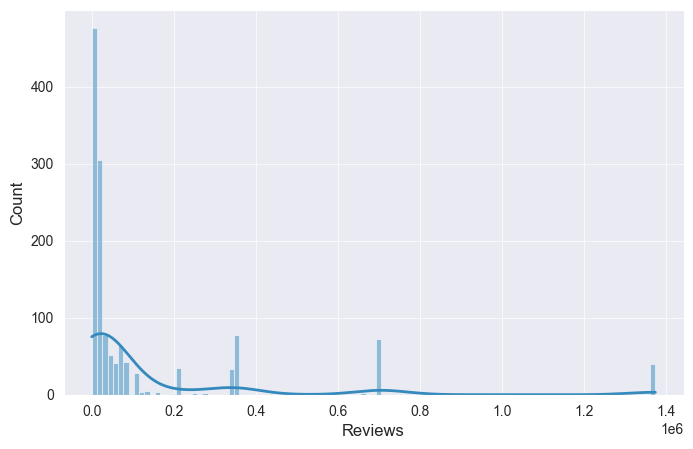

In [59]:
finance = df[df["Category"]=="FINANCE"]
plt.figure(figsize=(8,5))
sns.histplot(finance["Reviews"], kde=True)
plt.show();


### Q25 — Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression

model_df = df[["Rating","Sentiment_Polarity","Sentiment_Subjectivity","Reviews","Installs"]].dropna()

X = model_df[["Sentiment_Polarity","Sentiment_Subjectivity","Reviews","Installs"]]
y = model_df["Rating"]

lr = LinearRegression()
lr.fit(X,y)

coeffs = lr.coef_
intercept = lr.intercept_

intercept, coeffs


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


(np.float64(4.266575144461249),
 array([ 4.46452124e-02,  7.73721342e-02,  4.79979366e-09, -3.06092651e-11]))

### Q26 — Most Frequent Word in Negative Reviews

In [61]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

neg = df[df["Sentiment"]=="Negative"]["Translated_Review"].dropna().str.lower()

words = []
for review in neg:
    review = re.sub(r'[^a-z\s]','',review)
    tokens = [w for w in review.split() if w not in stop_words]
    words.extend(tokens)

pd.Series(words).value_counts().head(10)


game     4773
get      1393
time     1192
like     1069
play     1034
ads       942
cant      835
even      772
im        679
level     637
Name: count, dtype: int64

### Q27 — Median App Size (After Removing “Varies with device”)

In [62]:
filtered = df[df["Size"] != 0]   # because you replaced "Varies" with 0 earlier
filtered["Size"].median()


25.0

In [63]:
filtered = df[df["Size"] != df["Size"].min()]
filtered["Size"].median()


25.0

### Q28 — Parametric Test

#### c) ANOVA


### ✅ Q29 — SVM Parameter for Margin vs Error Trade-Off

#### B) C


### Q30 — Effect of Multicollinearity on Linear Regression Coefficients

#### B) They become unstable and highly sensitive to data changes
